IMAGE CLASSIFICATION

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define paths to your data
data_dir = 'Image Dataset'

# Image size expected by InceptionV3
img_width, img_height = 299, 299
batch_size = 32

# Create data generator with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation split

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # specify training data

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # specify validation data

# Load the InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with 10 output units (for 10 classes)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

# Define optimizer with a custom learning rate
optimizer = Adam(lr=0.0001)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Increase epochs for better convergence
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Save the model
model.save('custom_inceptionv3_model_finetuned.h5')


Found 2564 images belonging to 10 classes.
Found 635 images belonging to 10 classes.




Epoch 1/10



80/80 [==============================] - 647s 8s/step - loss: 0.9884 - accuracy: 0.7152 - val_loss: 0.4713 - val_accuracy: 0.8898
Epoch 2/10
80/80 [==============================] - 587s 7s/step - loss: 0.3763 - accuracy: 0.9044 - val_loss: 0.3341 - val_accuracy: 0.9095
Epoch 3/10
80/80 [==============================] - 602s 8s/step - loss: 0.2588 - accuracy: 0.9368 - val_loss: 0.2491 - val_accuracy: 0.9490
Epoch 4/10
80/80 [==============================] - 554s 7s/step - loss: 0.2115 - accuracy: 0.9526 - val_loss: 0.2198 - val_accuracy: 0.9391
Epoch 5/10
80/80 [==============================] - 548s 7s/step - loss: 0.1739 - accuracy: 0.9526 - val_loss: 0.1975 - val_accuracy: 0.9490
Epoch 6/10
80/80 [==============================] - 549s 7s/step - loss: 0.1505 - accuracy: 0.9641 - val_loss: 0.1940 - val_accuracy: 0.9539
Epoch 7/10
80/80 [==============================] - 609s 8s/step - loss: 0.1370 - accuracy: 0.9676 - val_loss: 0.1817 - val_accuracy: 0.9539
Epoch 8/10
80/80 [======

c:\Users\DArk SIde\Tensorflow\TFODCourse\tfod\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


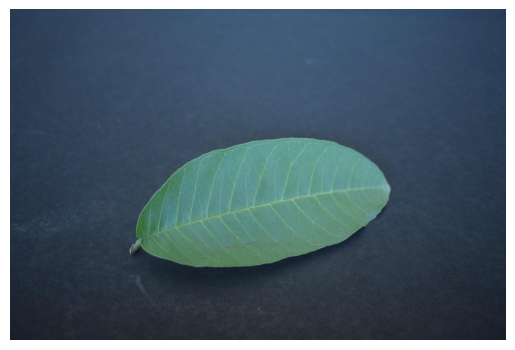

The image belongs to class: Gauva


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('custom_inceptionv3_model_finetuned.h5')

# Define a function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(299, 299))  # InceptionV3 expects input shape of 299x299
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize pixel values
    return img_array

# Define a function to perform classification on an image
def classify_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    class_index = np.argmax(predictions)  # Get the index of the class with highest probability
    return class_index

# Map class indices to class labels (you need to define this based on your dataset)
class_labels = {
    0: 'Arjun',
    1: 'Bael',
    2: 'Basil',
    3: 'Chinar',
    4: 'Gauva',
    5: 'Jamun',
    6: 'Jatropha',
    7: 'Lemon',
    8: 'Mango',
    9: 'Pomegranate',
    # Add more class labels as needed
}

# Example usage
image_path = r"Image Dataset\Gauva (P3)\0004_0003.JPG"  
class_index = classify_image(image_path)
class_label = class_labels.get(class_index, 'Unknown')

# Plot the image
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
# plt.title(f'Predicted Class: {class_label}')
plt.show()

print(f"The image belongs to class: {class_label}")


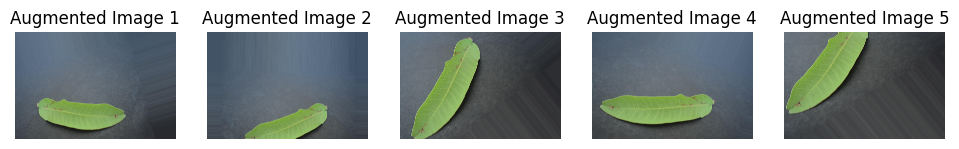

In [18]:

import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image
image = cv2.imread('Image Dataset/Gauva (P3)/0015_0139.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Reshape the image to (1, height, width, channels)
image = np.expand_dims(image, axis=0)

# Create ImageDataGenerator object with specified augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = []
num_augmented_images = 5  # Number of augmented images to generate

# Generate images using datagen.flow() method
for i, batch in enumerate(datagen.flow(image, batch_size=1)):
    augmented_image = batch[0].astype(np.uint8)  # Convert to uint8 for displaying
    augmented_images.append(augmented_image)
    if i >= num_augmented_images - 1:
        break

# Display original and augmented images
plt.figure(figsize=(12, 6))
for i, img in enumerate(augmented_images):
    plt.subplot(1, num_augmented_images, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Augmented Image {}'.format(i + 1))

plt.show()


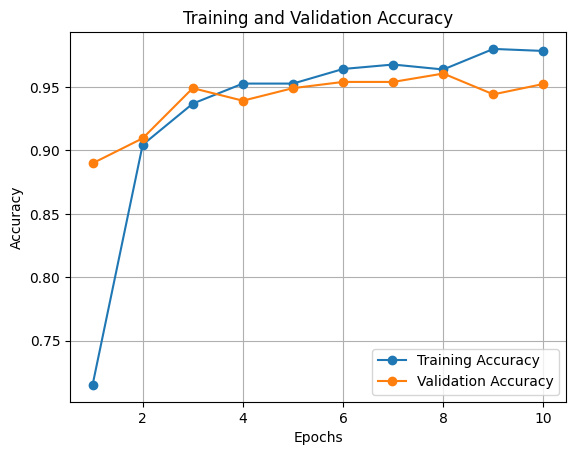

In [7]:
import matplotlib.pyplot as plt

# Define the data
train_accuracy = [0.7152, 0.9044, 0.9368, 0.9526, 0.9526, 0.9641, 0.9676, 0.9637, 0.9799, 0.9783]
val_accuracy = [0.8898, 0.9095, 0.9490, 0.9391, 0.9490, 0.9539, 0.9539, 0.9605, 0.9441, 0.9523]
epochs = range(1, 11)  # Assuming 10 epochs

# Plotting the training and validation accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()


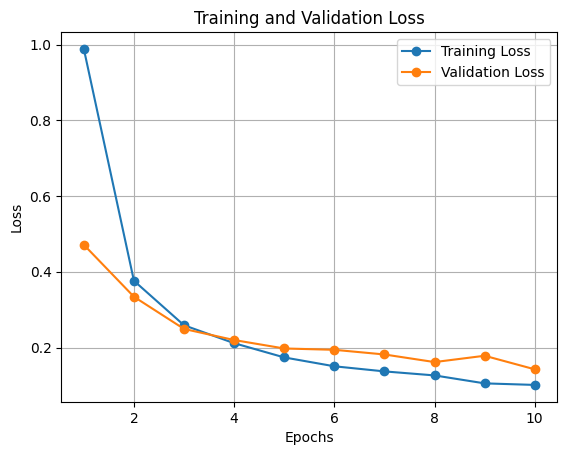

In [3]:
import matplotlib.pyplot as plt

# Define the data
train_loss = [0.9884, 0.3763, 0.2588, 0.2115, 0.1739, 0.1505, 0.1370, 0.1264, 0.1054, 0.1013]
val_loss = [0.4713, 0.3341, 0.2491, 0.2198, 0.1975, 0.1940, 0.1817, 0.1616, 0.1783, 0.1425]
epochs = range(1, 11)  # Assuming 10 epochs

# Plotting the training and validation loss
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()
